In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint 
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

# from sklearn.tree import export_graphviz
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

## NASA
Gegeven is de dataset **nasa.csv**. Deze dataset bevat gegevens en metingen van waargenomen meteorieten. De bedoeling is om op basis van deze metingen (features) een betrouwbare voorspelling te kunnen doen of een bepaalde meteoriet al dan niet gevaarlijk is. Of ze met andere woorden kan inslaan op de aarde.
Er wordt een accuracy van minstens 95% geëist.

### Inlezen en preprocessing van de dataset

1.  Verwijder de kolommen 'Neo Reference ID', 'Name', 'Close Approach Date','Epoch Date Close Approach', 'Orbiting Body','Orbit Determination Date' en 'Equinox'
2. Verwijder de samples met ontbrekende waarden volledig(listwise deletion)
3. Ga op zoek onrealistische waarden en verwijder telkens volledige sample (listwise deletion)
4. Vervang de waarden uit de target kolom Hazardous: False / True -> 0 / 1

In [2]:
# Inladen van de dataset
dataset = pd.read_csv('nasa.csv')
dataset.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,1995-01-01,788947200000,6.115834,22017.003799,0.419483,163.178711,62753692.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,yes
1,3723955,3723955,21.3,0.146068,0.326618,1995-01-01,788947200000,18.113985,65210.346095,0.383014,148.992630,57298148.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,no
2,2446862,2446862,20.3,0.231502,0.517654,1995-01-08,789552000000,7.590711,27326.560182,0.050956,19.821890,7622911.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,yes
3,3092506,3092506,27.4,0.008801,0.019681,1995-01-15,790156800000,11.173874,40225.948191,0.285322,110.990387,42683616.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,no
4,3514799,3514799,21.6,0.127220,0.284472,1995-01-15,790156800000,9.840831,35426.991794,0.407832,158.646713,61010824.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,yes


In [3]:
# Verwijderen van de gevraagde kolommen

# Verwijder de kolommen 'Neo Reference ID', 'Name', 'Close Approach Date','Epoch Date Close Approach', 'Orbiting Body','Orbit Determination Date' en 'Equinox'
dataset.drop(['Neo Reference ID'], axis=1, inplace=True)
dataset.drop(['Name'], axis=1, inplace=True)
dataset.drop(['Epoch Date Close Approach'], axis=1, inplace=True)
dataset.drop(['Close Approach Date'], axis=1, inplace=True)
dataset.drop(['Orbiting Body'], axis=1, inplace=True)
dataset.drop(['Orbit Determination Date'], axis=1, inplace=True)
dataset.drop(['Equinox'], axis=1, inplace=True)

# Vervang de waarden uit de output kolom Hazardous: False / True -> 0 / 1
dataset['Hazardous'] = dataset['Hazardous'].map({'no':0 ,'yes':1})

In [4]:
# Verwijderen van samples met ontbrekende waarden
print(dataset.isnull().sum())
print(dataset.shape)
dataset.dropna(inplace=True)
print(dataset.isnull().sum())
print(dataset.shape)

Absolute Magnitude              0
Est Dia in KM(min)              1
Est Dia in KM(max)              0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Orbit ID                        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Distance             0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
Hazardous                       0
dtype: int64
(4687, 25)
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Relative Velocity km per

In [5]:
dataset.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03,4686.000000,4686.000000,4686.000000
mean,678.266931,0.204640,0.457589,13.972317,50300.339848,0.256824,138.198644,4.996332e+07,28.303884,3.516219,0.082329,5056.151088,2.457724e+06,0.382601,1.400278,13.374256,172.156059,635.597761,0.813338,183.967256,1.987218,2.457728e+06,181.151697,0.738263,0.161118
std,3937.393092,0.369605,0.826461,7.293272,26255.780837,0.145779,2623.164517,1.310882e+08,38.303103,3.078214,0.090307,1237.947507,9.203868e+02,0.180450,0.524209,10.937357,103.287765,370.992760,0.242065,103.496175,0.951608,9.443060e+02,107.507352,0.342661,0.367679
min,-26.100000,0.001011,0.002260,0.335504,1207.814804,0.000178,0.069194,2.660989e+04,1.000000,0.000000,0.000002,2196.000000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,0.074824,8.437212,30373.963274,0.133440,51.908257,2.063112e+07,9.000000,0.000000,0.014585,4049.250000,2.458000e+06,0.240935,1.000635,4.961828,83.081111,365.605031,0.630834,95.633231,1.266059,2.457815e+06,86.997048,0.453263,0.000000
50%,22.000000,0.110804,0.247765,12.921682,46518.055335,0.265155,103.145134,4.029665e+07,16.000000,3.000000,0.047379,5071.000000,2.458000e+06,0.372513,1.240929,10.304912,172.625393,504.915377,0.833104,189.767263,1.618175,2.457973e+06,185.435988,0.712991,0.000000
75%,24.600000,0.253837,0.567597,18.077871,65080.334830,0.384159,149.437649,5.811893e+07,31.000000,6.000000,0.123609,6019.000000,2.458000e+06,0.512437,1.678427,19.515849,255.100144,794.240628,0.997175,271.794410,2.451763,2.458108e+06,276.531946,0.984669,0.000000
max,29345.000000,15.579552,34.836938,44.633747,160681.487851,0.499884,179625.000000,2.079439e+09,611.000000,9.000000,0.477891,9025.000000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


In [6]:
# outliers
from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 5).all(axis=1)]

dataset.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4.457000e+03,4457.000000,4457.000000,4457.000000,4457.000000,4.457000e+03,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4.457000e+03,4457.000000,4457.000000,4457.000000
mean,74.524669,0.193533,0.432752,14.007638,50427.496694,0.259454,100.927417,3.913578e+07,26.892753,3.431456,0.083663,5055.295266,2.457769e+06,0.382434,1.399211,13.475930,172.167655,634.408384,0.813794,183.969744,1.984629,2.457774e+06,182.247986,0.738006,0.164460
std,1007.592288,0.240460,0.537685,7.293929,26258.142914,0.144650,56.268857,2.447158e+07,29.348372,3.059747,0.090652,1235.274308,7.687103e+02,0.180427,0.518951,10.925665,103.282188,364.581600,0.243057,103.407024,0.940348,7.974917e+02,107.066958,0.342302,0.370734
min,-26.100000,0.001011,0.002260,0.335504,1207.814804,0.000178,0.069194,2.660989e+04,1.000000,0.000000,0.000002,2196.000000,2.453140e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.453089e+06,0.003191,0.160096,0.000000
25%,20.100000,0.035039,0.078350,8.468191,30485.488153,0.137115,53.337914,2.059791e+07,10.000000,0.000000,0.015609,4046.000000,2.458000e+06,0.240375,1.001280,5.035044,82.672140,365.958345,0.630305,96.256273,1.266862,2.457819e+06,88.451929,0.452172,0.000000
50%,21.800000,0.116026,0.259442,13.005597,46820.148017,0.268401,104.408188,4.018810e+07,17.000000,3.000000,0.048679,5075.000000,2.458000e+06,0.372837,1.240195,10.427723,171.715314,504.467747,0.833861,189.385574,1.618195,2.457977e+06,186.864212,0.713623,0.000000
75%,24.400000,0.253837,0.567597,18.135814,65288.930834,0.385801,150.076630,5.776776e+07,32.000000,6.000000,0.125694,6008.000000,2.458000e+06,0.512357,1.681127,19.765560,255.173379,796.158072,0.998453,271.811263,2.461334,2.458110e+06,276.531946,0.983719,0.000000
max,20224.000000,2.016299,4.508582,44.633747,160681.487851,0.499884,194.454910,5.333644e+08,214.000000,9.000000,0.477891,9025.000000,2.458000e+06,0.960261,3.359049,67.310143,359.905890,2248.655832,1.299832,359.993098,5.924213,2.458839e+06,359.917991,2.039000,1.000000


### One hot encoding van de categorische features

De feature 'Orbit ID' bevat categorische (niet-numerieke) variabelen. Daarom zetten we die om naar one-hot encoded vectoren.
Dit kan in Pandas via de functie get_dummies.
Op deze manier worden extra features gecreëerd gelijk aan het aantal categorieën en worden deze aan het eind van de featureset toegevoegd. Vervolgens verwijderen we de originele feature kolom.
Check of er nog categorische features aanwezig zijn en zet ze om naar one-hot encoded vectoren

In [7]:
# one-hot encoding van 'Orbit ID'

dataset = pd.concat([dataset,pd.get_dummies(dataset['Orbit ID'], prefix='Orbit_ID')],axis=1)

dataset.drop(['Orbit ID'],axis=1, inplace=True)
dataset.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Relative Velocity km per hr,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Orbit_ID_1,Orbit_ID_2,Orbit_ID_3,Orbit_ID_4,Orbit_ID_5,Orbit_ID_6,Orbit_ID_7,Orbit_ID_8,Orbit_ID_9,Orbit_ID_10,Orbit_ID_11,Orbit_ID_12,Orbit_ID_13,Orbit_ID_14,Orbit_ID_15,Orbit_ID_16,Orbit_ID_17,Orbit_ID_18,Orbit_ID_19,Orbit_ID_20,Orbit_ID_21,Orbit_ID_22,Orbit_ID_23,Orbit_ID_24,Orbit_ID_25,Orbit_ID_26,Orbit_ID_27,Orbit_ID_28,Orbit_ID_29,Orbit_ID_30,Orbit_ID_31,Orbit_ID_32,Orbit_ID_33,Orbit_ID_34,Orbit_ID_35,Orbit_ID_36,Orbit_ID_37,Orbit_ID_38,Orbit_ID_39,Orbit_ID_40,Orbit_ID_41,Orbit_ID_42,Orbit_ID_43,Orbit_ID_44,Orbit_ID_45,Orbit_ID_46,Orbit_ID_47,Orbit_ID_48,Orbit_ID_49,Orbit_ID_50,Orbit_ID_51,Orbit_ID_52,Orbit_ID_53,Orbit_ID_54,Orbit_ID_55,Orbit_ID_56,Orbit_ID_57,Orbit_ID_58,Orbit_ID_59,Orbit_ID_60,Orbit_ID_61,Orbit_ID_62,Orbit_ID_63,Orbit_ID_64,Orbit_ID_65,Orbit_ID_66,Orbit_ID_67,Orbit_ID_68,Orbit_ID_69,Orbit_ID_70,Orbit_ID_71,Orbit_ID_72,Orbit_ID_73,Orbit_ID_74,Orbit_ID_75,Orbit_ID_76,Orbit_ID_77,Orbit_ID_78,Orbit_ID_79,Orbit_ID_80,Orbit_ID_81,Orbit_ID_82,Orbit_ID_83,Orbit_ID_84,Orbit_ID_85,Orbit_ID_86,Orbit_ID_87,Orbit_ID_88,Orbit_ID_89,Orbit_ID_90,Orbit_ID_91,Orbit_ID_92,Orbit_ID_93,Orbit_ID_94,Orbit_ID_95,Orbit_ID_96,Orbit_ID_97,Orbit_ID_98,Orbit_ID_99,Orbit_ID_100,Orbit_ID_101,Orbit_ID_102,Orbit_ID_103,Orbit_ID_104,Orbit_ID_105,Orbit_ID_106,Orbit_ID_107,Orbit_ID_108,Orbit_ID_109,Orbit_ID_111,Orbit_ID_112,Orbit_ID_113,Orbit_ID_114,Orbit_ID_115,Orbit_ID_116,Orbit_ID_117,Orbit_ID_119,Orbit_ID_120,Orbit_ID_121,Orbit_ID_122,Orbit_ID_123,Orbit_ID_125,Orbit_ID_126,Orbit_ID_128,Orbit_ID_130,Orbit_ID_131,Orbit_ID_132,Orbit_ID_133,Orbit_ID_134,Orbit_ID_137,Orbit_ID_138,Orbit_ID_140,Orbit_ID_143,Orbit_ID_146,Orbit_ID_147,Orbit_ID_148,Orbit_ID_149,Orbit_ID_152,Orbit_ID_154,Orbit_ID_156,Orbit_ID_157,Orbit_ID_158,Orbit_ID_159,Orbit_ID_163,Orbit_ID_164,Orbit_ID_165,Orbit_ID_167,Orbit_ID_170,Orbit_ID_172,Orbit_ID_175,Orbit_ID_176,Orbit_ID_182,Orbit_ID_184,Orbit_ID_185,Orbit_ID_190,Orbit_ID_192,Orbit_ID_193,Orbit_ID_207,Orbit_ID_211,Orbit_ID_212,Orbit_ID_213,Orbit_ID_214
0,21.6,0.127220,0.284472,6.115834,22017.003799,0.419483,163.178711,62753692.0,5,0.025282,4634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21.3,0.146068,0.326618,18.113985,65210.346095,0.383014,148.992630,57298148.0,3,0.186935,5457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20.3,0.231502,0.517654,7.590711,27326.560182,0.050956,19.821890,7622911.5,0,0.043058,4557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
# check for categorical features

dataset.dtypes

# no categorical features

Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant       int64
Epoch Osculation                float64
Eccentricity                    float64
Semi Major Axis                 float64
Inclination                     float64
Asc Node Longitude              float64
Orbital Period                  float64
Perihelion Distance             float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
Hazardous                         int64
Orbit_ID_1                        uint8


Controleer of de dataset al dan niet **gebalanceerd** is. **Antwoord** duidelijk of dit al dan niet het geval is en wat de **mogelijke gevolgen** kunnen zijn mocht deze niet gebalanceerd zijn.

0    3724
1     733
Name: Hazardous, dtype: int64


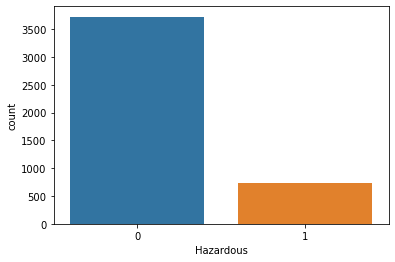

In [9]:
# Controleer of de dataset gebalanceerd is. 
sns.countplot(x='Hazardous',data=dataset)
print(dataset['Hazardous'].value_counts())

No, as you can see class 0 has 3724 samples and class 1 with 733 samples. Therefore, the dataset is not balanced.

The consequences:
- The cost of missing a minority class is much higher than missing a majority class.
- Imbalanced classes may not maximize the overall accuracy due to the lack of dataset.

### Trainen van de classifier

Splits eerst de features op in een training- en test set. 

Zorg ervoor dat er exact **1000 samples** in de test set steken en gebruik een **random_state = 0**.

In [10]:
# Opsplitsen in features en targets. 
X = dataset.drop('Hazardous', axis=1).values
y = dataset['Hazardous'].values

# Opsplitsen in test en training_set met 1000 waarden in test set en random_state = 0. Normaliseer de features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state = 0)
print(X_train)
print(X_test)

[[24.5         0.03346224  0.07482384 ...  0.          0.
   0.        ]
 [21.          0.16770846  0.37500752 ...  0.          0.
   0.        ]
 [23.9         0.04411182  0.09863703 ...  0.          0.
   0.        ]
 ...
 [20.2         0.24241248  0.54205079 ...  0.          0.
   0.        ]
 [17.7         0.76657557  1.71411509 ...  0.          0.
   0.        ]
 [21.5         0.13321557  0.29787906 ...  0.          0.
   0.        ]]
[[2.33000000e+01 5.81507040e-02 1.30028927e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.15000000e+01 1.33215567e-01 2.97879063e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.96000000e+01 3.19561887e-01 7.14562102e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.69000000e+01 1.10803882e-02 2.47765013e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.45000000e+01 3.34622374e-02 7.48238376e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.11000000e+01 1.60160338e-01 3.58129403e-01 ... 0.000

In [11]:
# Normaliseer de features

## Standard scaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[-0.05159565 -0.67187093 -0.67187093 ... -0.02405974  0.
   0.        ]
 [-0.05495837 -0.10835817 -0.10835817 ... -0.02405974  0.
   0.        ]
 [-0.05217212 -0.62716818 -0.62716818 ... -0.02405974  0.
   0.        ]
 ...
 [-0.05572699  0.20521987  0.20521987 ... -0.02405974  0.
   0.        ]
 [-0.05812893  2.40545003  2.40545003 ... -0.02405974  0.
   0.        ]
 [-0.05447798 -0.25314576 -0.25314576 ... -0.02405974  0.
   0.        ]]
[[-0.05274858 -0.56823848 -0.56823848 ... -0.02405974  0.
   0.        ]
 [-0.05447798 -0.25314576 -0.25314576 ... -0.02405974  0.
   0.        ]
 [-0.05630346  0.52906268  0.52906268 ... -0.02405974  0.
   0.        ]
 ...
 [-0.04928979 -0.76582112 -0.76582112 ... -0.02405974  0.
   0.        ]
 [-0.05159565 -0.67187093 -0.67187093 ... -0.02405974  0.
   0.        ]
 [-0.05486229 -0.14004222 -0.14004222 ... -0.02405974  0.
   0.        ]]


Train een logistic regression classifier met een **C-waarde van 0.001**
**Normaliseer** de data vooraleer je een classifier traint.
Test deze classifier: bepaal de accuracy, precision, recall en f1-score. Geef ook de confusion matrix.

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       844
           1       0.62      0.49      0.55       156

    accuracy                           0.87      1000
   macro avg       0.77      0.72      0.74      1000
weighted avg       0.86      0.87      0.87      1000

test set:  87.4
[[797  47]
 [ 79  77]]


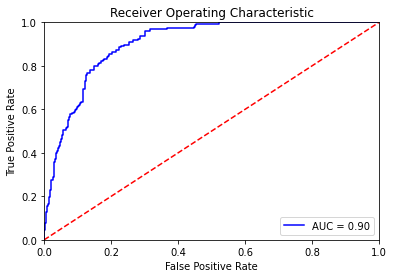

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2880
           1       0.69      0.50      0.58       577

    accuracy                           0.88      3457
   macro avg       0.80      0.73      0.75      3457
weighted avg       0.87      0.88      0.87      3457

training set:  87.90859126410182
[[2750  130]
 [ 288  289]]


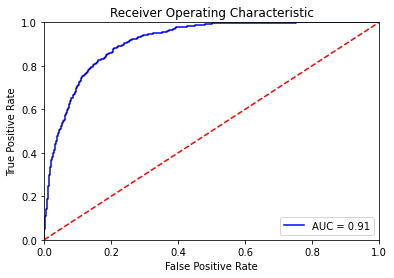

In [12]:
# Trainen en testen van een logistic regression classifier met C=0.001

logreg = linear_model.LogisticRegression(C=0.001, solver='liblinear')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print('test set: ', accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# training set

y_pred = logreg.predict(X_train)

print(classification_report(y_train,y_pred))

print('training set: ', accuracy_score(y_train,y_pred)*100)

print(confusion_matrix(y_train,y_pred))

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Bespreek de bekomen testresultaten van de logistic regression classifier met C=0.001.

**Heeft deze classifier last van underfitting of overfitting? Hoe kan je dat te weten komen? Illustreer.**

**Bespreek de getallen in de confusion matrix**. Zijn deze te linken aan de al dan niet gebalanceerdheid van de data?


**Antwoorden:**

**Heeft deze classifier last van underfitting of overfitting? Hoe kan je dat te weten komen? Illustreer.**

- Heeft deze classifier last van underfitting of overfitting? Hoe kan je dat te weten komen? Illustreer

As you can see above from the accuracy on the test amounts 87,4% and on the training set 87.90%. The accuracy on the training set is slightly higher than the test set. This means that the classifier is dealing with an overfitting. For illustration, I have implemented the ROC. The area under the curve is slightly higher on the training set. (0.91 trainingset vs 0.90 testset)


- Bespreek de getallen in de confusion matrix. Zijn deze te linken aan de al dan niet gebalanceerdheid van de data?

From our confusion matrix, we can see that our model got (797+77) 874 predictions right and (79+47) 126 predictions wrong. We have 47 false positive which means that our model predicted that 47 are hazardous but it turned out not to be. On the other hand, our model also has 79 false negative. What this means is that our model predicted 79 were not hazardous while they are positive. 

Moreover based on the classification report there is a preference for class 0 with 0.93% compared with class 1 with 0.55%. 

Yes there is a link with the unbalanced data. We can clearly see from the confusion matrix that there is a very low number of one class. In this case, it is 876 (797+79) for class 0 and 124 (47+77) for class 1.

Gebruik **cross-validatie om een goede C-waarde te vinden voor de logistic regression classifier**

In [13]:
# Cross-validatie logistic regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
paramaters = [
             {'C' : np.arange(0.001,1000,100),
              'solver': ['liblinear','lbfgs', 'newton-cg', 'sag','saga'], 
              'class_weight': [None, 'balanced'],
             },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 732 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 966 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1236 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1542 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1884 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 13.3min finished


Best accuracy :  0.9123554913294798
Best parameters : {'C': 100.001, 'class_weight': None, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       844
           1       0.81      0.71      0.76       156

    accuracy                           0.93      1000
   macro avg       0.88      0.84      0.86      1000
weighted avg       0.93      0.93      0.93      1000

[[818  26]
 [ 45 111]]
92.9


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

parameters = [
             {'C' : uniform(0.01, 20), 
              'solver': ['liblinear','lbfgs', 'newton-cg', 'sag','saga'], 
              'class_weight': [None, 'balanced'],
             }
             ]

              

n_iter_search = 20

random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=20,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.3min finished


Best accuracy :  0.914380293050141
Best parameters : {'C': 16.682651210851347, 'class_weight': None, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       844
           1       0.81      0.70      0.75       156

    accuracy                           0.93      1000
   macro avg       0.88      0.83      0.85      1000
weighted avg       0.92      0.93      0.92      1000

[[818  26]
 [ 47 109]]
92.7


**Bespreek de resultaten na cross-validatie**

**Antwoord:**

Our initial accuracy on the test set amounts 87,4%. After the cross-validation we can see an increase to 92,9% with grid search and 92,7% with random search. Moreover, we are not dealing with an overfitting. Therefore the logistic regression with grid search method is the most reliable model.

**Train een Support Vector Machine**. Je mag onmiddellijk cross-validatie toepassen voor het vinden van de optimale parameters.

In [15]:
# cross-validatie Support Vector Machine

# Trainen van SVM via cross-validation
SVMlinear = svm.SVC(kernel='linear',C=1)
SVMlinear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [16]:
# test het model op de test set
y_pred = SVMlinear.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       844
           1       0.82      0.72      0.76       156

    accuracy                           0.93      1000
   macro avg       0.88      0.84      0.86      1000
weighted avg       0.93      0.93      0.93      1000

[[819  25]
 [ 44 112]]
93.10000000000001


In [17]:
# test het model op de training set
y_pred = SVMlinear.predict(X_train)
print(classification_report(y_train, y_pred))

cf = confusion_matrix(y_train, y_pred)
print(cf)
print(accuracy_score(y_train, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2880
           1       0.83      0.71      0.76       577

    accuracy                           0.93      3457
   macro avg       0.88      0.84      0.86      3457
weighted avg       0.92      0.93      0.92      3457

[[2794   86]
 [ 168  409]]
92.65258894995661


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()

paramaters = [ 
       {'kernel': ['linear'], 
         'C': np.linspace(0.01,20,10), 
         'class_weight': [None, 'balanced']},
        {'kernel': ['rbf', 'poly', 'sigmoid'], 
         'C': np.linspace(0.01,20,10), 
         'gamma': [0.001, 0.01, 0.1, 0.2], 
         'class_weight': [None, 'balanced']},
]

grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy', 
                           cv = 20,
                           n_jobs = -1,
                           verbose =5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  
print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )


y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 


Fitting 20 folds for each of 260 candidates, totalling 5200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

Best accuracy :  0.914094636375857
Best parameters : {'C': 8.894444444444444, 'class_weight': None, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       844
           1       0.84      0.74      0.78       156

    accuracy                           0.94      1000
   macro avg       0.90      0.86      0.87      1000
weighted avg       0.93      0.94      0.94      1000

[[822  22]
 [ 41 115]]
93.7


In [19]:
# Train een SVM via random search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from scipy.stats import uniform


#svc trainen
model = SVC()

parameters = [
     {'kernel': ['linear'], 
     'C': uniform(0.01, 20), 
     'class_weight': [None, 'balanced']
    },
    {'kernel': ['rbf', 'poly', 'sigmoid'], 
     'C': uniform(0.01, 20), 
     'gamma': [0.001, 0.01, 0.1, 0.2], 
     'class_weight': [None, 'balanced']}
]
 
n_iter_search = 20

random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


Best accuracy :  0.9172670085241293
Best parameters : {'C': 10.4486355123514, 'class_weight': None, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       844
           1       0.83      0.74      0.78       156

    accuracy                           0.94      1000
   macro avg       0.89      0.85      0.87      1000
weighted avg       0.93      0.94      0.93      1000

[[820  24]
 [ 41 115]]
93.5


**Bespreek de resultaten na cross-validatie op SVM**

**Antwoord:**

Our initial accuracy on the test set amounts 93,1%. After the cross-validation we can see a slight increase to 93,7% with grid search and 93,5% with random search. Moreover, we are not dealing with an overfitting. Therefore the SVM with grid search method is the most reliable model.

Train een **Random Forest Classifier**. Het max_number_of_features is een hyperparameter waarvan je zelf de optimale waarde zoekt. Start met een 200-tal bomen. Dit aantal kan je tijdens de hyperparametertuning aanpassen.

- Test deze classifier op de trainingset. Wat zijn jouw bevindingen en conclusies? Vergelijk de resultaten met deze van logistic regression en SVM.

- Bepaal via deze random forest tree classifier de belangrijkste features. 

In [20]:
# Trainen en testen van een random forest tree classifier
number_of_trees = 200
max_number_of_features = 10

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)


RFCmodel.fit(X_train,y_train)

# print(RFCmodel.feature_importances_)

importance  = RFCmodel.feature_importances_


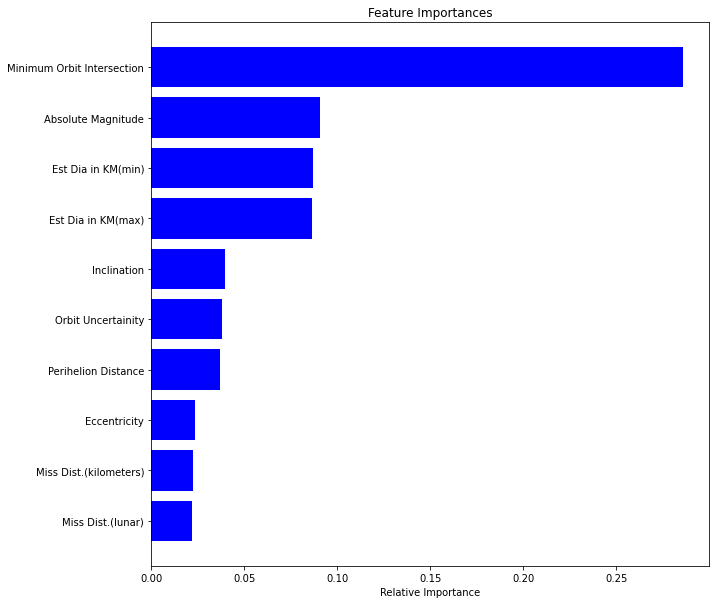

In [21]:
features = dataset.columns
importances = importance
indices = np.argsort(importances)

# customized number 
num_features = 10 
 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [22]:
# test random forest classifier --> test set
y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.98      0.99      0.98       156

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000

[[841   3]
 [  2 154]]
99.5


In [23]:
# test random forest classifier --> training set 
y_pred = RFCmodel.predict(X_train)

print(classification_report(y_train, y_pred))

cf = confusion_matrix(y_train, y_pred)
print(cf)
print(accuracy_score(y_train, y_pred) * 100) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2880
           1       1.00      1.00      1.00       577

    accuracy                           1.00      3457
   macro avg       1.00      1.00      1.00      3457
weighted avg       1.00      1.00      1.00      3457

[[2880    0]
 [   0  577]]
100.0


#### cross-validation random forest tree classifier

In [24]:
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 600, 800, 1000],
              'max_features': [2, 4, 6, 8, 10, 12, 14], 
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
             },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 378 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

Best accuracy :  0.995086705202312
Best parameters : {'max_features': 14, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 600}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.99      0.99      0.99       156

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[[842   2]
 [  1 155]]
99.7


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from scipy.stats import uniform


model = RandomForestClassifier()

parameters = [
             {'n_estimators' : [100, 200, 300, 600, 800, 1000],
              'max_features': [2, 4, 6, 8, 10, 12, 14], 
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
             },
             ]

              

n_iter_search = 20

random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=20,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.6min finished


Best accuracy :  0.995086705202312
Best parameters : {'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 14}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.99      0.99      0.99       156

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[[842   2]
 [  1 155]]
99.7


- Test deze classifier op de trainingset. Wat zijn jouw bevindingen en conclusies? Vergelijk de resultaten met deze van logistic regression en SVM.

The accuracy on the training set with the random forest classifier amounts 100% compared with 87,9% (logistic regression) and 92,65% (SVM). Therefore for this dataset the random forest classifier is the most reliable model.

- Bepaal via deze random forest tree classifier de belangrijkste features. 

In [26]:
imp_list = []
for i,v in enumerate(importance):
    imp_list.append((i, v))
sorted_list = sorted(imp_list, key=lambda x: x[1], reverse=True)
print('The top 10 Feature importances are:' '\n')
for f, i in sorted_list[:10]:
    print(f'{dataset.columns[f]}, Score: {round(i, 3)}')

The top 10 Feature importances are:

Minimum Orbit Intersection, Score: 0.285
Absolute Magnitude, Score: 0.091
Est Dia in KM(min), Score: 0.087
Est Dia in KM(max), Score: 0.086
Inclination, Score: 0.04
Orbit Uncertainity, Score: 0.038
Perihelion Distance, Score: 0.037
Eccentricity, Score: 0.023
Miss Dist.(kilometers), Score: 0.023
Miss Dist.(lunar), Score: 0.022


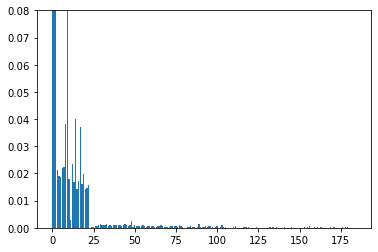

In [27]:
# Plot importances:
plt.bar([x for x in range(len(importance))], importance)
plt.ylim(0, 0.08)
plt.show()

Text(0, 0.5, 'Feature Importance Value')

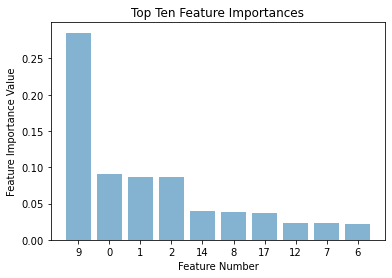

In [28]:
# Plot top ten importances
plt.bar(range(1, 11), [x[1] for x in sorted_list[:10]], 
            tick_label=[x[0] for x in sorted_list[:10]], 
            color = (0.2,0.5,0.7,0.6))
plt.title('Top Ten Feature Importances')
plt.xlabel('Feature Number')
plt.ylabel('Feature Importance Value')

Bepaal uit de gertrainde Random Forest Classifier de belangrijkheid van de features (model.feature_importances_). 

Welke zijn de 10 belangrijkste features?

- Minimum Orbit Intersection, Score: 0.285
- Absolute Magnitude, Score: 0.091
- Est Dia in KM(min), Score: 0.087
- Est Dia in KM(max), Score: 0.086
- Inclination, Score: 0.04
- Orbit Uncertainity, Score: 0.038
- Perihelion Distance, Score: 0.037
- Eccentricity, Score: 0.023
- Miss Dist.(kilometers), Score: 0.023
- Miss Dist.(lunar), Score: 0.022

Train het model opnieuw met deze 10 belangrijkste features. Test het model en verklaar de resulaten.

Reduceer het aantal features nog verder en bekijk telkens de accuracy. Verklaar de resultaten.

- Train het model opnieuw met deze 10 belangrijkste features. Test het model en verklaar de resulaten.

In [101]:
# Train het model opnieuw met deze 10 belangrijkste features. Test het model en verklaar de resulaten.

sum_column = dataset[['Minimum Orbit Intersection', 'Absolute Magnitude','Est Dia in KM(min)', 'Est Dia in KM(max)', 'Inclination', 'Perihelion Distance', 'Orbit Uncertainity', 'Miss Dist.(lunar)', 'Eccentricity', 'Miss Dist.(kilometers)']]
X = sum_column.values
y = dataset['Hazardous'].values

#print(X)
#print(y)
# Opsplitsen in test en training_set met 1000 waarden in test set en random_state = 0. Normaliseer de features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state = 0)
#print(X_train)
#print(X_test)

In [102]:
# Normaliseer de features

## Standard scaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# print(X_train)
# print(X_test)

In [103]:
# Trainen en testen van een random forest tree classifier
number_of_trees = 200
max_number_of_features = 10

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)


RFCmodel.fit(X_train,y_train)

#print(RFCmodel.feature_importances_)
importance  = RFCmodel.feature_importances_


In [34]:
# test random forest classifier
y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.97      1.00      0.99       156

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[[840   4]
 [  0 156]]
99.6


In [35]:
# test random forest classifier --> train
y_pred = RFCmodel.predict(X_train)

print(classification_report(y_train, y_pred))

cf = confusion_matrix(y_train, y_pred)
print(cf)
print(accuracy_score(y_train, y_pred) * 100) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2880
           1       1.00      1.00      1.00       577

    accuracy                           1.00      3457
   macro avg       1.00      1.00      1.00      3457
weighted avg       1.00      1.00      1.00      3457

[[2880    0]
 [   0  577]]
100.0


## cross validate random forest

In [36]:
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 600, 800, 1000],
              'max_features': [2, 4, 6, 8, 10, 12, 14], 
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
             },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 378 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

Best accuracy :  0.9965317919075145
Best parameters : {'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.98      0.99      0.98       156

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000

[[841   3]
 [  2 154]]
99.5


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from scipy.stats import uniform


model = RandomForestClassifier()

parameters = [
             {'n_estimators' : [100, 200, 300, 600, 800, 1000],
              'max_features': [2, 4, 6, 8, 10, 12, 14], 
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
             },
             ]

              

n_iter_search = 20

random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=20,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.7min finished


Best accuracy :  0.9959537572254336
Best parameters : {'n_estimators': 600, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.98      0.99      0.99       156

    accuracy                           1.00      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[[841   3]
 [  1 155]]
99.6


- Train het model opnieuw met deze 10 belangrijkste features. Test het model en verklaar de resulaten.

By reducing the features to the top 10, we can see that the accuracy score decreased from 99,7% to 99,6% (random search). The slight decrease has to do with using a smaller dataset for the X values. Eventhough the model has not been improved, we clearly can see that the execution time has been reduced.

- Reduceer het aantal features nog verder en bekijk telkens de accuracy. Verklaar de resultaten.

In [108]:
# Reduceren van het aantal features en hertrainen via een random forest classifier.

# Train het model opnieuw met deze 6 belangrijkste features. Test het model en verklaar de resulaten.

sum_column = dataset[['Minimum Orbit Intersection', 'Absolute Magnitude','Est Dia in KM(min)', 'Est Dia in KM(max)', 'Inclination', 'Perihelion Distance']]
X = sum_column.values
y = dataset['Hazardous'].values

#print(X)
#print(y)
# Opsplitsen in test en training_set met 1000 waarden in test set en random_state = 0. Normaliseer de features.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state = 0)
#print(X_train)
#print(X_test)

In [107]:
# Normaliseer de features

## Standard scaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)
#print(X_test)

In [40]:
# Trainen en testen van een random forest tree classifier
number_of_trees = 200
max_number_of_features = 4

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)


RFCmodel.fit(X_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=200)

In [41]:
# test random forest classifier
y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.97      0.99      0.98       156

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000

[[840   4]
 [  1 155]]
99.5


In [42]:
# test random forest classifier --> train
y_pred = RFCmodel.predict(X_train)

print(classification_report(y_train, y_pred))

cf = confusion_matrix(y_train, y_pred)
print(cf)
print(accuracy_score(y_train, y_pred) * 100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2880
           1       1.00      1.00      1.00       577

    accuracy                           1.00      3457
   macro avg       1.00      1.00      1.00      3457
weighted avg       1.00      1.00      1.00      3457

[[2880    0]
 [   0  577]]
100.0


## cross validate random forest

In [43]:
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 600, 800, 1000],
              'max_features': [2, 4, 6, 8, 10, 12, 14], 
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
             },
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1,
                           verbose=5)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 378 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

Best accuracy :  0.9965317919075145
Best parameters : {'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.97      0.99      0.98       156

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000

[[840   4]
 [  1 155]]
99.5


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
from scipy.stats import uniform


model = RandomForestClassifier()

parameters = [
             {'n_estimators' : [100, 200, 300, 600, 800, 1000],
              'max_features': [2, 4, 6, 8, 10, 12, 14], 
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
             },
             ]

              

n_iter_search = 20

random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=20,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_ 
best_parameters = random_search.best_params_  

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.7min finished


Best accuracy :  0.995663059551015
Best parameters : {'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 4}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.97      0.99      0.98       156

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000

[[840   4]
 [  1 155]]
99.5


- Reduceer het aantal features nog verder en bekijk telkens de accuracy. Verklaar de resultaten.

By reducing the features to the top 6, we can see that the accuracy score decreased from 99,6% to 99,5%. The slight decrease has to do with using a smaller dataset for the X values.Eventhough the model has not been improved, we clearly can see that the execution time has been further reduced.

Kijk of je via boosting (Adaboost) de accuracy op de test set nog kunt verhogen. Het type classifier (base estimator) mag je zelf kiezen.

In [113]:
clf_adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.9)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       0.99      0.99      0.99       156

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000

[[843   1]
 [  2 154]]
99.7


For the boosting method, I opted for the random forest classifier as it has the highest accuracy compared with the logistic regression and SVM classifier. As we can see from the adaboost result, the accuracy increased slightly from 99,5% to 99,7%. Therefore, there is a slight improvement with implementing the adaboost but remained the same with the initial classifier.

In general we can see that reducing the features for the random forest classifier is not ideal as it is not improving the model.